# Install the latest py4Ceed lib

In [ ]:
!pip install ipywidgets
!pip install pandas
!pip install matplotlib
!jupyter nbextension enable --py widgetsnbextension --sys-prefix
!pip install py4ceedlib -U

# Import Py4Ceed Library and Data plotting Library

In [1]:
from py4ceedlib import py4ceed
from matplotlib import pyplot as plt

# Enter 4Ceed Key
For this demonstration, please enter the provided key:  
**011c066d-a1e5-423b-a84e-a6a476926a3c**

In [4]:
py4ceed.enter_key()

Text(value='', description='User Key:')

Button(description='Submit', style=ButtonStyle())

Successfully validated credentials


# Select Metadata to Read from 4Ceed
Make sure to select all 14 of BCB Etch Test datasets in "MSE 598-DM: Jupyter Demo Data".  
After hitting "Submit", wait until the table prints.

In [5]:
py4ceed.read_datasets_metadata()

Retrieving datasets ... 


Accordion(children=(Accordion(children=(Accordion(children=(Accordion(), Accordion()), _titles={'0': 'soares35…

Button(description='Submit', style=ButtonStyle())

Done Retrieving ... 


,BCB_Etch_Depth,PR_Etch_Depth,Etch_Time,SF6_Flow,O2_Flow,Pressure,ICP_Power
BCB Etch Test 14,4.83,6.440,3.0,15.0,35.0,3.0,1000.0
BCB Etch Test 13,4.92,6.390,3.0,15.0,35.0,3.0,750.0
BCB Etch Test 12,3.78,4.667,3.0,15.0,35.0,3.0,500.0
BCB Etch Test 11,1.80,1.714,3.0,15.0,35.0,3.0,0.0
BCB Etch Test 10,2.40,3.750,3.0,37.5,12.5,7.5,300.0
BCB Etch Test 9,1.92,3.840,3.0,25.0,25.0,7.5,300.0
BCB Etch Test 8,2.22,3.581,3.0,15.0,35.0,7.5,300.0
BCB Etch Test 7,2.55,3.750,3.0,5.0,45.0,7.5,300.0
BCB Etch Test 6,1.80,1.525,3.0,50.0,0.0,3.0,300.0
BCB Etch Test 5,2.40,2.162,3.0,37.5,12.5,3.0,300.0


# Analyzing Our Data: Etch Rate
Now that we have the BCB metadata loaded, we can retreive it in the form of a pandas DataFrame:

In [6]:
metadata = py4ceed.get_metadeta()   #Store's the loaded metadata into a variable 'metadata' as a pandas DataFrame
metadata   #Prints out the full metadata table

,BCB_Etch_Depth,PR_Etch_Depth,Etch_Time,SF6_Flow,O2_Flow,Pressure,ICP_Power
BCB Etch Test 14,4.83,6.440,3.0,15.0,35.0,3.0,1000.0
BCB Etch Test 13,4.92,6.390,3.0,15.0,35.0,3.0,750.0
BCB Etch Test 12,3.78,4.667,3.0,15.0,35.0,3.0,500.0
BCB Etch Test 11,1.80,1.714,3.0,15.0,35.0,3.0,0.0
BCB Etch Test 10,2.40,3.750,3.0,37.5,12.5,7.5,300.0
BCB Etch Test 9,1.92,3.840,3.0,25.0,25.0,7.5,300.0
BCB Etch Test 8,2.22,3.581,3.0,15.0,35.0,7.5,300.0
BCB Etch Test 7,2.55,3.750,3.0,5.0,45.0,7.5,300.0
BCB Etch Test 6,1.80,1.525,3.0,50.0,0.0,3.0,300.0
BCB Etch Test 5,2.40,2.162,3.0,37.5,12.5,3.0,300.0


### Adding new columns by function and basic filtering
While seeing all of this data in a table is helpful to understand it, defining some key calculations can be even more beneficial.  

**Etch rate** is a critical variable when designing an etching process and is defined simply as the amount of material etched in some unit of time. Here, we'll define it in terms of $\mu m$/min (which are the units our etch depth and time are kept as)

Creating and adding this new value to the metadata table is simple, as done below. In addition, to reduce the clutter of the table, we filter the metadata to only print relevant parameters:

In [7]:
metadata['Etch_Rate']=metadata['BCB_Etch_Depth']/metadata['Etch_Time']   #Creates a new column as a function of other columns
metadata[['SF6_Flow','O2_Flow','Pressure','ICP_Power','Etch_Rate']]   #Prints out only the selected parameters

,SF6_Flow,O2_Flow,Pressure,ICP_Power,Etch_Rate
BCB Etch Test 14,15.0,35.0,3.0,1000.0,1.61
BCB Etch Test 13,15.0,35.0,3.0,750.0,1.64
BCB Etch Test 12,15.0,35.0,3.0,500.0,1.26
BCB Etch Test 11,15.0,35.0,3.0,0.0,0.60
BCB Etch Test 10,37.5,12.5,7.5,300.0,0.80
BCB Etch Test 9,25.0,25.0,7.5,300.0,0.64
BCB Etch Test 8,15.0,35.0,7.5,300.0,0.74
BCB Etch Test 7,5.0,45.0,7.5,300.0,0.85
BCB Etch Test 6,50.0,0.0,3.0,300.0,0.60
BCB Etch Test 5,37.5,12.5,3.0,300.0,0.80


### Conditional filtering and sorting
When trying to determine the effect some parameter, such as SF<sub>6</sub> Flow, has on the etch rate, we want to isolate it as the only variable. This is where conditional filtering comes in; we can extract each dataset with an ICP Power of 300 W and Pressure of 3 mT to ensure only the gas flow is changing.

After that, to find the recipe with the highest etch rate, we can sort the values and display them.

In [8]:
metadata_300ICP_3mT = metadata[(metadata['ICP_Power']==300) & (metadata['Pressure']==3)]  #Filters and returns data meeting the criteria
metadata_300ICP_3mT.sort_values(by=['Etch_Rate'], ascending=False)   #Sorts and prints the data by the given parameters

,BCB_Etch_Depth,PR_Etch_Depth,Etch_Time,SF6_Flow,O2_Flow,Pressure,ICP_Power,Etch_Rate
BCB Etch Test 2,2.55,3.542,3.0,5.0,45.0,3.0,300.0,0.85
BCB Etch Test 5,2.40,2.162,3.0,37.5,12.5,3.0,300.0,0.80
BCB Etch Test 3,2.22,2.775,3.0,15.0,35.0,3.0,300.0,0.74
BCB Etch Test 4,1.95,2.786,3.0,25.0,25.0,3.0,300.0,0.65
BCB Etch Test 6,1.80,1.525,3.0,50.0,0.0,3.0,300.0,0.60
BCB Etch Test 1,0.42,3.231,3.0,0.0,50.0,3.0,300.0,0.14


### Visualizing the data
Lastly, let's create a plot of our etch rate vs. SF<sub>6</sub> Flow to try and visualize any trends:

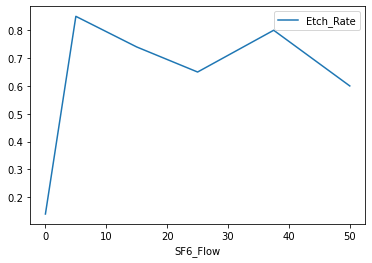

In [9]:
metadata_300ICP_3mT.plot(x='SF6_Flow', y='Etch_Rate')   #Plot the metadata accoriding to the provided x and y
plt.show()

This is just a short example of how Jupyter 4CeeD integration, using pandas DataFrames, can allow rapid and consistent analysis of measured experiment data. For further functionality:
### See [pandas DataFrame Reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for other built in functions available for the metadata

---

# Analyzing Our Data: Your Turn
Think of some other important quantity that can be calculated from the provided data to give further insight. Using the examples above and the DataFrame reference:

* **Create this quantity and add it to the metadata.**  
* **Create a visualization of this quantity versus some relevant parameter.** 

Remember to filter your data to avoid capturing effects of other parameter changes.

---
*Some hints for new quantities:*
* _PR is used as a masking material, but it also etches so ideally we want a recipe that etches slower compared to BCB_
* _Often a gas's percentage of total gas flow rate is a better indicator of its effects than just total flow_
* _How may the pressure or ICP power be affecting the etches?_

In [16]:
#Add new quantity here:
metadata['SF6_Flow_percent']=metadata['SF6_Flow']/(metadata['SF6_Flow'] + metadata['O2_Flow'])   #Creates a new column as a function of other columns
metadata['O2_Flow_percent']=metadata['O2_Flow']/(metadata['SF6_Flow'] + metadata['O2_Flow'])   #Creates a new column as a function of other columns
metadata[['O2_Flow_percent','SF6_Flow_percent','Pressure','ICP_Power', 'Etch_Rate']]   #Prints out only the selected parameters

metadata_SF6_300ICP_3mT = metadata[(metadata['ICP_Power']==300) & (metadata['Pressure']==3)]  #Filters and returns data meeting the criteria
metadata_SF6_300ICP_3mT.sort_values(by=['SF6_Flow_percent'], ascending=False)   #Sorts and prints the data by the given parameters

metadata_O2_300ICP_3mT = metadata[(metadata['ICP_Power']==300) & (metadata['Pressure']==3)]  #Filters and returns data meeting the criteria
metadata_O2_300ICP_3mT.sort_values(by=['O2_Flow_percent'], ascending=False)   #Sorts and prints the data by the given parameters

,BCB_Etch_Depth,PR_Etch_Depth,Etch_Time,SF6_Flow,O2_Flow,Pressure,ICP_Power,Etch_Rate,SF6_Flow_percent,O2_Flow_percent
BCB Etch Test 1,0.42,3.231,3.0,0.0,50.0,3.0,300.0,0.14,0.00,1.00
BCB Etch Test 2,2.55,3.542,3.0,5.0,45.0,3.0,300.0,0.85,0.10,0.90
BCB Etch Test 3,2.22,2.775,3.0,15.0,35.0,3.0,300.0,0.74,0.30,0.70
BCB Etch Test 4,1.95,2.786,3.0,25.0,25.0,3.0,300.0,0.65,0.50,0.50
BCB Etch Test 5,2.40,2.162,3.0,37.5,12.5,3.0,300.0,0.80,0.75,0.25
BCB Etch Test 6,1.80,1.525,3.0,50.0,0.0,3.0,300.0,0.60,1.00,0.00


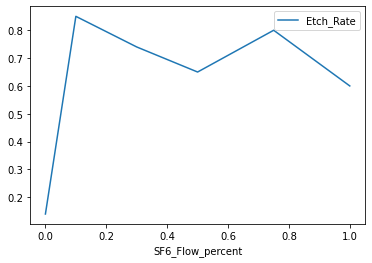

In [17]:
#Create visualization here
metadata_SF6_300ICP_3mT.plot(x='SF6_Flow_percent', y='Etch_Rate')   #Plot the metadata accoriding to the provided x and y
plt.show()

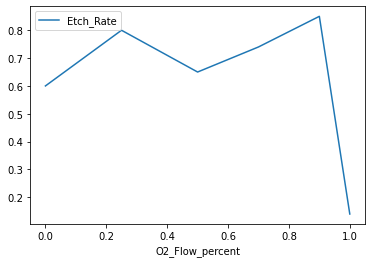

In [18]:
metadata_O2_300ICP_3mT.plot(x='O2_Flow_percent', y='Etch_Rate')   #Plot the metadata accoriding to the provided x and y
plt.show()

# Saving Our Analysis:
Finally, after gathering valuable information from our experiment, we need to save this data. Thankfully 4CeeD has a built in function that can capture this entire document:

<ins>Note</ins>: Make sure to include the current file name and to save the notebook before running; also **update the group letter variable so the snapshots save separately**

In [ ]:
netid = ''   #Replace with your group
py4ceed.save_notebook('MSE598JupyterDemo', save_as='MSE598sp22-Demo_'+netid)   #Saves a snapshot of this notebook to your 4CeeD